In [100]:

import numpy as np
from typing import Tuple

from scipy.stats import mode
from sklearn.metrics import confusion_matrix
import seaborn as sns

csv_path = "iris.csv"

In [101]:
def load_csv(csv_path:str)->Tuple[np.ndarray,np.ndarray]:
    np.random.seed(42)
    dataset = np.genfromtxt(csv_path,delimiter=',')
    np.random.shuffle(dataset)
    x,y =dataset[:,:-1],dataset[:,-1]
    return x,y

In [102]:
x,y = load_csv(csv_path)

In [103]:
x[np.isnan(x)] = 3.5

In [ ]:
y = np.delete(y,np.where(x<0.0)[0],axis = 0)
y = np.delete(y,np.where(x>10.0)[0],axis = 0)
x = np.delete(x,np.where(x<0.0)[0],axis = 0)
x = np.delete(x,np.where(x>10.0)[0],axis = 0)

In [104]:
def train_test_split(features:np.ndarray,
                    labels:np.ndarray,
                    test_split_ratio:float) ->Tuple[np.ndarray,np.ndarray,np.ndarray,np.ndarray]:
    test_size =int(len(features)*test_split_ratio)
    train_size = len(features) - test_size
    assert len(features) ==test_size + train_size,"Size mismatch"
    
    x_train,y_train = features[:train_size,:],labels[:train_size]
    x_test,y_test = features[train_size:,:],labels[train_size:]

    return x_train,y_train,x_test,y_test


In [105]:
x_train,y_train,x_test,y_test = train_test_split(x,y,0.2)

In [106]:
def euclidean(points:np.ndarray,element_of_x:np.ndarray) ->np.ndarray:
    return np.sqrt(np.sum((points - element_of_x)**2,axis=1))

In [107]:
def predict(x_train:np.ndarray,y_train:np.ndarray,x_test:np.ndarray,k:int)->np.array:
    labels_pred=[]
    for x_test_element in x_test:
        distances = euclidean(x_train,x_test_element)
        distances = np.array(sorted(zip(distances,y_train)))

        label_pred = mode(distances[:k,1],keepdims=False).mode
        labels_pred.append(label_pred)
    return np.array(labels_pred,dtype=np.int64)


In [108]:
y_preds = predict(x_train,y_train,x_test,3)


In [109]:
def accuracy(y_test:np.ndarray,y_preds:np.ndarray)->float:
    true_positive = (y_test == y_preds).sum()
    return true_positive / len(y_test) *100

In [110]:
accuracy(y_test,y_preds)

90.0

In [111]:
def plot_confusion_matrix(y_test:np.ndarray,y_preds:np.ndarray):
    conf_matrix = confusion_matrix(y_test,y_preds)
    sns.heatmap(conf_matrix,annot=True)

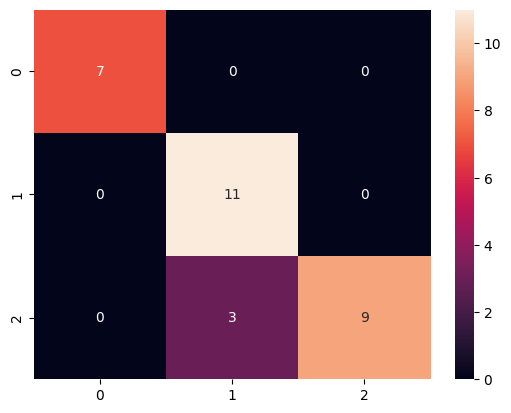

In [112]:
plot_confusion_matrix(y_test,y_preds)